In [1]:
!if [[ ! -d PROJECT ]] && [[ ! -d PIGEON ]]; then git clone https://github.com/iggy2k/CSC490-Project-Winter-2025.git PROJECT; fi

! was unexpected at this time.


In [2]:
# import sys
# import os
# sys.path.append(os.path.abspath('./PROJECT'))

import os
import sys

# Local
if os.path.isdir('PIGEON/'):
    PIGEON_DIR = 'PIGEON/'
# Git clone when colab
else:
    PIGEON_DIR = 'PROJECT/PIGEON/'

os.environ["PIGEON_DIR"] = PIGEON_DIR
sys.path.insert(1, PIGEON_DIR)

In [16]:
# Import setup module
from modules.setup import install_dependencies, extract_dataset
from modules.drive import mount_drive, setup_dataset

# Run setup steps
# mount_drive()
setup_dataset(local_path="./490data.tar.gz")  # Change for local use
install_dependencies()
extract_dataset()


🗑️ Removing old data folder...
📂 Extracting dataset...
✅ Dataset setup completed!


  0%|          | 0/26 [00:00<?, ?it/s]

✅ Successfully installed fiona
✅ Successfully installed folium
✅ Successfully installed geopandas
✅ Successfully installed huggingface_hub
✅ Successfully installed ipython
✅ Successfully installed ipywidgets
✅ Successfully installed jinja2
✅ Successfully installed jupyter
✅ Successfully installed markupsafe
⚠️ Error installing matplotlib-base: Command 'pip install matplotlib-base' returned non-zero exit status 1.
✅ Successfully installed matplotlib-inline
✅ Successfully installed nbconvert
✅ Successfully installed nbformat
✅ Successfully installed notebook
✅ Successfully installed numpy
✅ Successfully installed pandas
✅ Successfully installed pip
✅ Successfully installed pynvml
⚠️ Error installing python: Command 'pip install python' returned non-zero exit status 1.
⚠️ Error installing pytorch: Command 'pip install pytorch' returned non-zero exit status 1.
✅ Successfully installed scikit-learn
✅ Successfully installed scipy
✅ Successfully installed torchvision
✅ Successfully installed 

In [5]:
# This is supposed to make sure if you edit .py files
# colab will pick up on it
%load_ext autoreload
%autoreload 2

In [6]:
from modules.dataset import (
    download_osv5m_dataset,
    extract_zip_files,
    load_datasets,
    create_dataloaders,
    get_device
)

download_osv5m_dataset()
extract_zip_files()

In [7]:
train_dataset, val_dataset = load_datasets()
train_dataloader, val_dataloader = create_dataloaders(train_dataset, val_dataset)

Reading datasets/osv5m/images/train/00
Found 50000 files.
Found 9999 csv entries.


Processing files:   0%|          | 0/50000 [00:00<?, ?it/s]

Keeping 10000 items
Dataset ready, 10000 files.
Skipped 0 non-land files.
Reading datasets/osv5m/images/test/00
Found 50000 files.
Found 1000 csv entries.


Processing files:   0%|          | 0/50000 [00:00<?, ?it/s]

Keeping 10000 items
Dataset ready, 10000 files.
Skipped 0 non-land files.
✅ Loaded Train: 9999 images, Validation: 1000 images


In [8]:
import torch

if torch.cuda.is_available():
  device = torch.device("cuda")
  print('using cuda')
else:
  device = torch.device("cpu")
  print('using cpu')

using cpu


In [9]:
CLIP_MODEL = 'openai/clip-vit-base-patch32'

In [ ]:
# !pip install -q git+https://github.com/openai/CLIP.git

In [17]:
!mkdir -p data/geocells/
# Political boundaries (admin0 = country)
![ ! -f data/geocells/admin_2.geojson ] && wget --show-progress -O data/geocells/admin_2.geojson -q https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM2.geojson
![ ! -f data/geocells/admin_1.geojson ] && wget --show-progress -O data/geocells/admin_1.geojson -q https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM1.geojson
![ ! -f data/geocells/countries.geojson ] && wget --show-progress -O data/geocells/countries.geojson -q https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.geojson

The syntax of the command is incorrect.
'[' is not recognized as an internal or external command,
operable program or batch file.
'[' is not recognized as an internal or external command,
operable program or batch file.
'[' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
!pip install -q geojson

In [12]:
from modules.geocell import hook, simplify_geojson

c:\Users\bfong\anaconda3\envs\3-8-10\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [13]:
import os
import sys

# Local
if os.path.isdir('PIGEON/'):
    PIGEON_DIR = 'PIGEON/'
# Git clone when colab
else:
    PIGEON_DIR = 'PROJECT/PIGEON/'

os.environ["PIGEON_DIR"] = PIGEON_DIR
sys.path.insert(1, PIGEON_DIR)

In [18]:
from pathlib import Path

SIMPLIFY_GEOJSON = True

if SIMPLIFY_GEOJSON:
    print('Simplifying geojson file for faster geocell gen...')

    new_admin1 = simplify_geojson('data/geocells/admin_1.geojson', 2.5)
    new_admin2 = simplify_geojson('data/geocells/admin_2.geojson', 2.5)
    new_countries = simplify_geojson('data/geocells/countries.geojson', 2.5)

    COUNTRY_PATH = 'data/geocells/countries.geojson_compressed_2.5.geojson'
    ADMIN_1_PATH = 'data/geocells/admin_1.geojson_compressed_2.5.geojson'
    ADMIN_2_PATH = 'data/geocells/admin_2.geojson_compressed_2.5.geojson'

    print('New geojson files:', COUNTRY_PATH, ADMIN_1_PATH, ADMIN_2_PATH)

Simplifying geojson file for faster geocell gen...
data/geocells/admin_1.geojson_compressed_2.5.geojson alredy exists, skipping...
data/geocells/admin_2.geojson_compressed_2.5.geojson alredy exists, skipping...
data/geocells/countries.geojson_compressed_2.5.geojson alredy exists, skipping...
New geojson files: data/geocells/countries.geojson_compressed_2.5.geojson data/geocells/admin_1.geojson_compressed_2.5.geojson data/geocells/admin_2.geojson_compressed_2.5.geojson


In [19]:
# TODO: pre-generate all this, add to the repo and add option to load instead
import sys
sys.path.append(f'{PIGEON_DIR}/dataset_creation/geocell')
sys.path.append(PIGEON_DIR)

from geocell_creation import *

GEOCELL_PATH = 'data/geocells_yfcc.csv'
df = train_dataset.df
geocells_file = Path(GEOCELL_PATH)
if not geocells_file.is_file():
    geocell_creator = GeocellCreator(df, GEOCELL_PATH)
    geocells = geocell_creator.generate()
else:
  print('Loading existing geocells')

Loading existing geocells


In [21]:
!pip install -q huggingface-hub transformers pygeos
!pip install -q -U dill datasets

In [22]:
from accelerate import Accelerator
accelerator = Accelerator()

In [23]:
from modules.model import GeoLocationModel

c:\Users\bfong\anaconda3\envs\3-8-10\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
c:\Users\bfong\anaconda3\envs\3-8-10\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
c:\Users\bfong\anaconda3\envs\3-8-10\lib\site-package

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [24]:
from modules.loss import HaversineLoss

In [25]:
import torch.optim as optim

from torch.optim.lr_scheduler import ExponentialLR

haversineLoss = HaversineLoss()
# mseLoss = nn.MSELoss()
# ceLoss = nn.CrossEntropyLoss()
model = GeoLocationModel()

optimizer = optim.SGD(model.parameters(), lr=0.001)
scheduler = ExponentialLR(optimizer, gamma=0.8)

In [26]:
!pip install -q livelossplot

In [27]:
from livelossplot import PlotLosses

In [28]:
from ipywidgets import Output
OUTPUT_CONTEXT = Output()
display(OUTPUT_CONTEXT)

Output()

In [29]:
# Clean-up if re-running
model = GeoLocationModel()
torch.cuda.empty_cache()

In [30]:
from modules.train import train_model
from accelerate import Accelerator

# Initialize necessary components
accelerator = Accelerator()

# Call the function
avg_epoch_loss = train_model(
    model=model,
    optimizer=optimizer,
    train_dataloader=train_dataloader,
    accelerator=accelerator,
    scheduler=scheduler,
    num_epochs=1,
    haversineLoss=haversineLoss,
    OUTPUT_CONTEXT=OUTPUT_CONTEXT
)

Setting figsize to (10, 5)


                                             
Epochs:   0%|          | 0/1 [00:05<?, ?it/s]            

Loss: 0.77954;                         
Out: [32.130498222009, 31.310276145056005]                        
Expected: [32.98361587524414, -0.9919910430908203]


                                             
Epochs:   0%|          | 0/1 [00:17<?, ?it/s]                      

Loss: 0.75608;                         
Out: [32.943473093404755, 31.04165329998054]                        
Expected: [29.95969009399414, -11.093717575073242]


                                             
Epochs:   0%|          | 0/1 [00:28<?, ?it/s]                      

Loss: 0.88984;                         
Out: [32.130498222009, 31.310276145056005]                        
Expected: [39.83282470703125, -13.120271682739258]


                                             
Epochs:   0%|          | 0/1 [00:39<?, ?it/s]                      

Loss: 0.66837;                         
Out: [33.7564479648005, 30.77303045490507]                        
Expected: [32.78456115722656, -22.43380355834961]


                                             
Epochs:   0%|          | 0/1 [00:52<?, ?it/s]                      

Loss: 0.76401;                         
Out: [32.943473093404755, 31.04165329998054]                        
Expected: [28.784427642822266, 16.419506072998047]


                                             
Epochs:   0%|          | 0/1 [01:03<?, ?it/s]                      

Loss: 0.71995;                         
Out: [10.892541319702561, 30.268084488586407]                        
Expected: [32.83873748779297, -6.398502826690674]


                                             
Epochs:   0%|          | 0/1 [01:16<?, ?it/s]                      

Loss: 0.75269;                         
Out: [-16.924151863365, 32.657317532705]                        
Expected: [34.29327392578125, -12.569073677062988]


                                             
Epochs:   0%|          | 0/1 [01:29<?, ?it/s]                      

Loss: 0.80184;                         
Out: [44.715630088255274, 27.48187680912121]                        
Expected: [38.671600341796875, 7.649874687194824]


                                             
Epochs:   0%|          | 0/1 [01:40<?, ?it/s]                      

Loss: 0.81146;                         
Out: [41.46373060267228, 28.55636818942309]                        
Expected: [35.50496292114258, -17.483570098876953]


                                             
Epochs:   0%|          | 0/1 [01:51<?, ?it/s]                    

Loss: 0.88655;                         
Out: [41.46373060267228, 28.55636818942309]                        
Expected: [30.299854278564453, 16.740806579589844]


                                             
Epochs:   0%|          | 0/1 [02:03<?, ?it/s]                     

Loss: 0.67878;                         
Out: [41.90691680840659, 29.434836070818243]                        
Expected: [34.133628845214844, -26.959524154663086]


Epochs:   0%|          | 0/1 [02:12<?, ?it/s]


KeyboardInterrupt: 

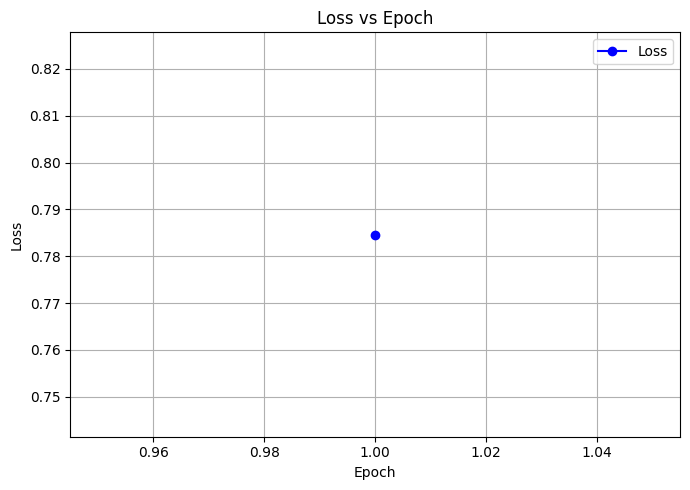

In [ ]:
import matplotlib.pyplot as plt
avg_epoch_loss = torch.tensor(avg_epoch_loss, device =  'cpu')
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(avg_epoch_loss) + 1), avg_epoch_loss, label='Loss', color='blue', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
model.eval()

GeoLocationModel(
  (base_model): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
        (position_embedding): Embedding(50, 768)
      )
      (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-11): 12 x CLIPEncoderLayer(
            (self_attn): CLIPSdpaAttention(
              (k_proj): Linear(in_features=768, out_features=768, bias=True)
              (v_proj): Linear(in_features=768, out_features=768, bias=True)
              (q_proj): Linear(in_features=768, out_features=768, bias=True)
              (out_proj): Linear(in_features=768, out_features=768, bias=True)
            )
            (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): QuickGELUActivation()
       

In [ ]:
avg_val_haversine_loss = 0.0
batch_haversine = []

model, optimizer, val_dataloader = accelerator.prepare(model, optimizer, val_dataloader)

with torch.no_grad():  # Disable gradient calculation for validation
    for images, coordinates, image_path in tqdm(val_dataloader, total=len(val_dataloader), desc=f'Validating'):
        # Forward pass
        images, coordinates = images.cuda(), coordinates.cuda()
        outputs = model(images, coordinates, image_path)
        loss_haversine = haversineLoss(outputs['pred'], coordinates).mean(dim=-1)
        batch_haversine.append(loss_haversine)
        avg_val_haversine_loss += loss_haversine

# Calculate average loss and haversine
avg_val_haversine_loss /= len(val_dataloader)

print(f'Validation Haversine Loss: {avg_val_haversine_loss:.4f}')

Validating: 100%|██████████| 313/313 [02:16<00:00,  2.30it/s]


Validation Haversine Loss: 0.7965


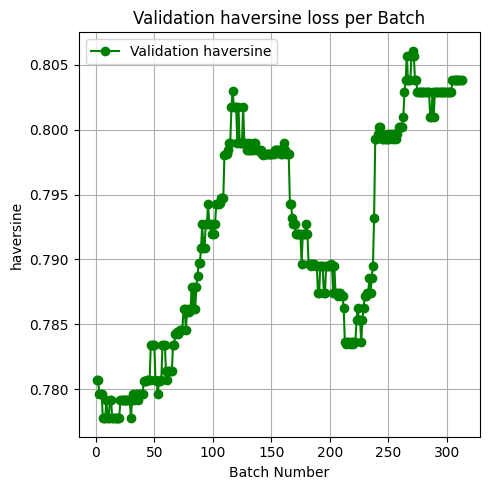

In [ ]:
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Back from gpu
batch_haversine = torch.tensor(batch_haversine, device =  'cpu')

# Remove outliers
batch_haversine = median_filter(batch_haversine, size=100)

plt.figure(figsize=(5, 5))
plt.subplot(1, 1, 1)
plt.plot(range(1, len(batch_haversine) + 1), batch_haversine, label='Validation haversine', color='green', marker='o')
plt.xlabel('Batch Number')
plt.ylabel('haversine')
plt.title('Validation haversine loss per Batch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from modules.plot import plot_predictions

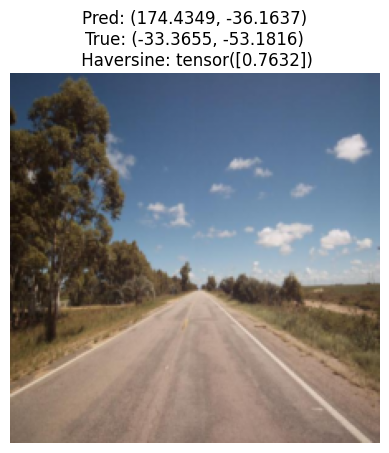

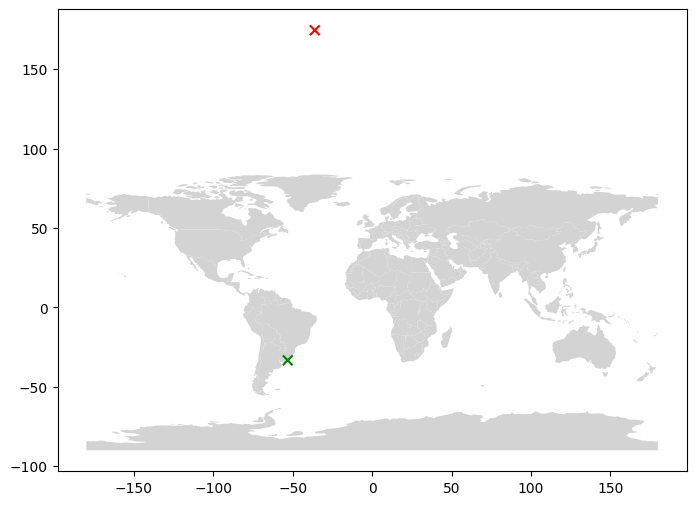

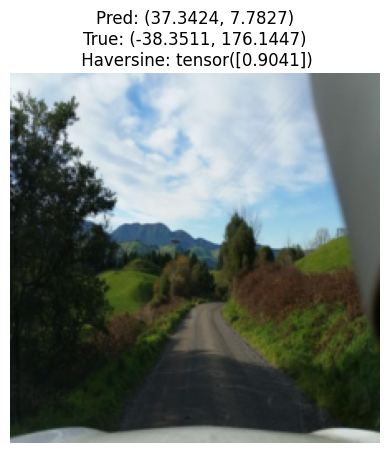

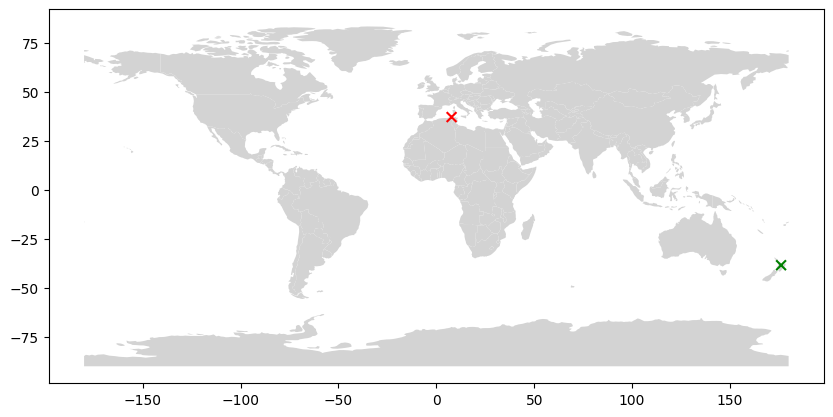

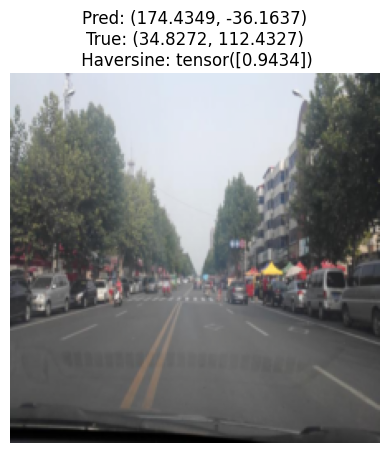

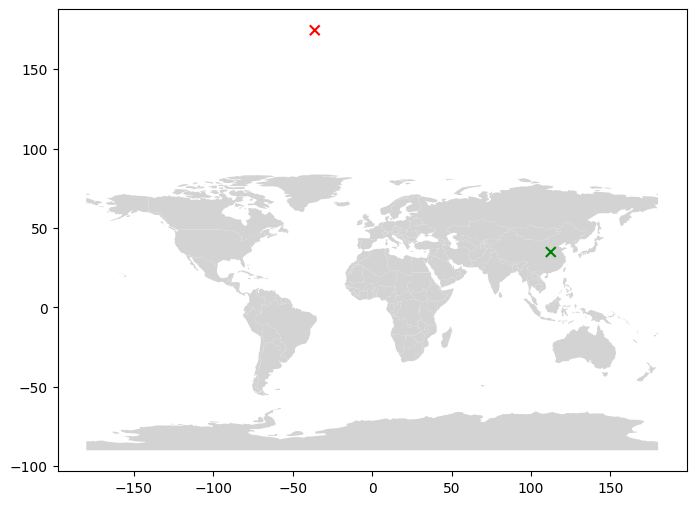

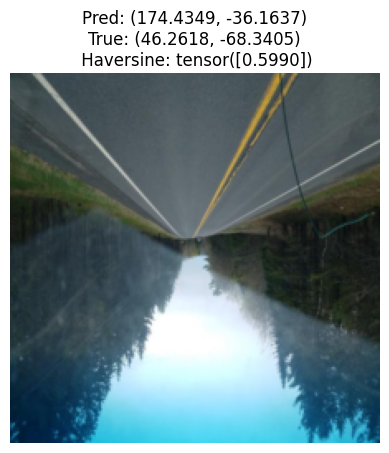

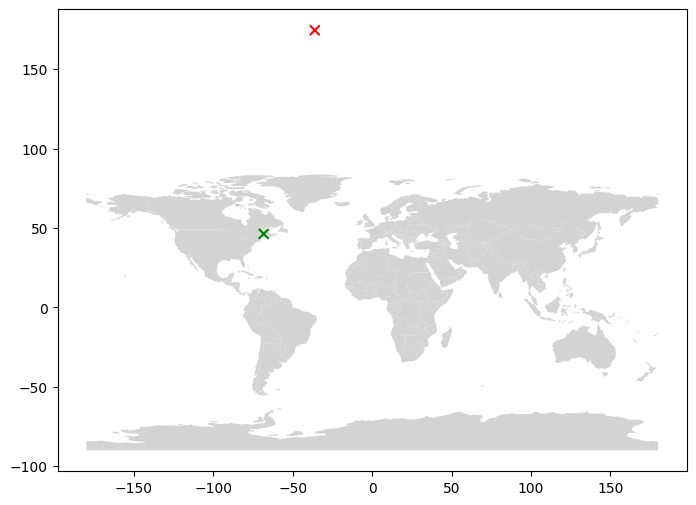

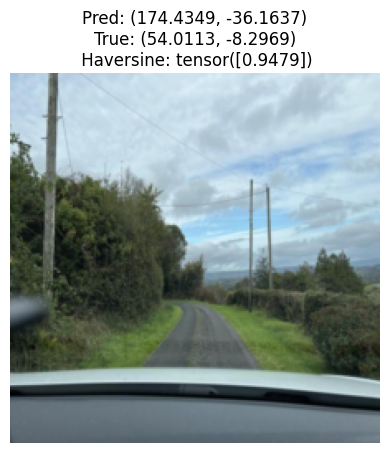

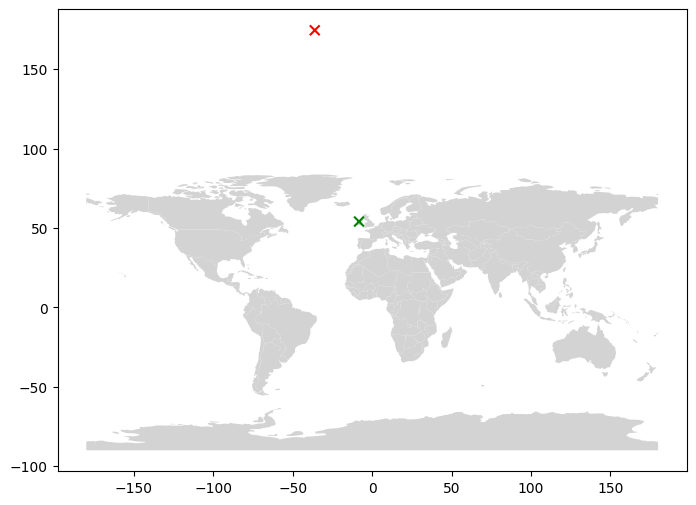

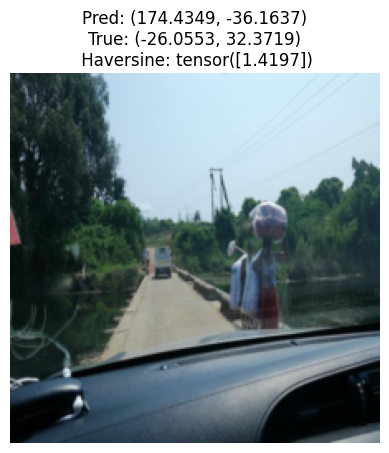

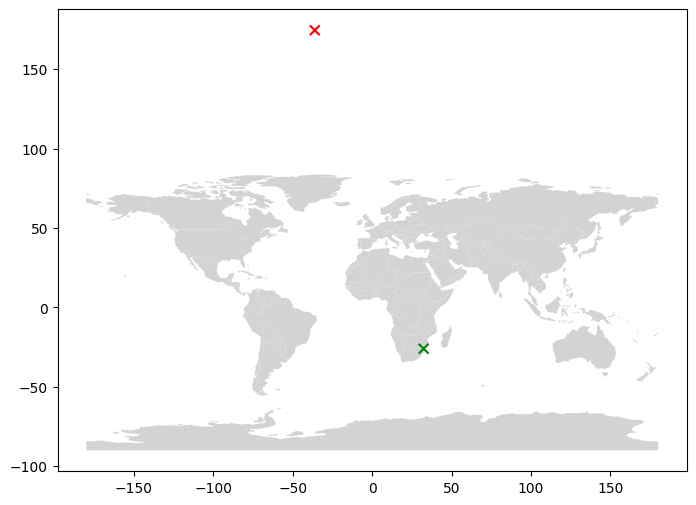

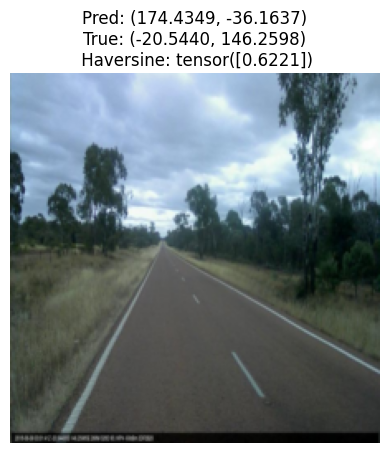

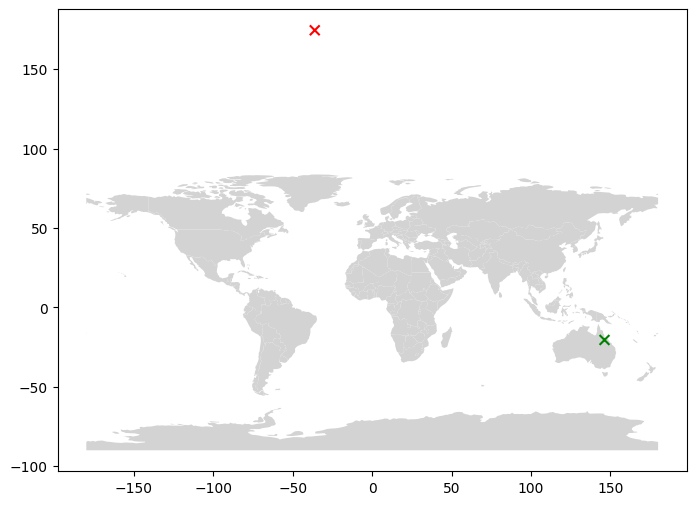

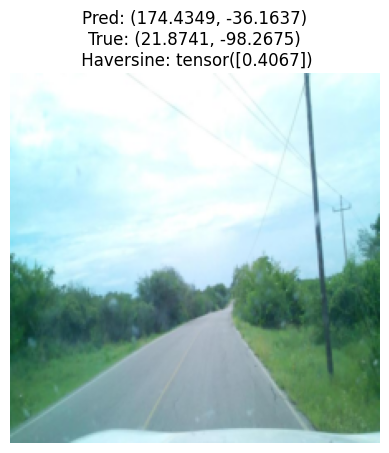

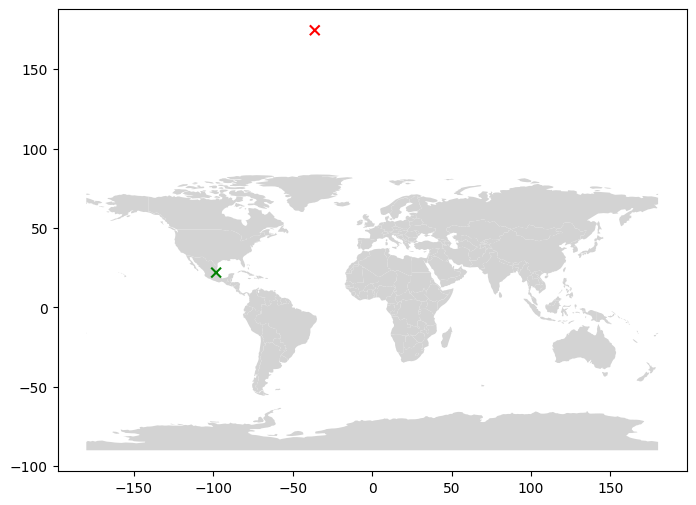

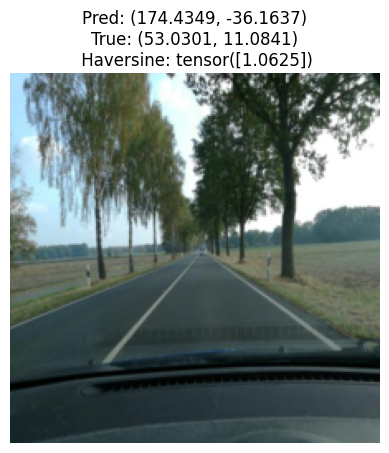

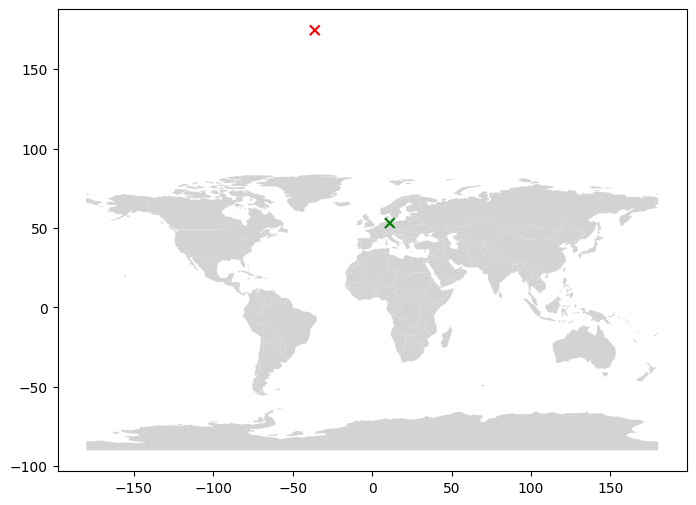

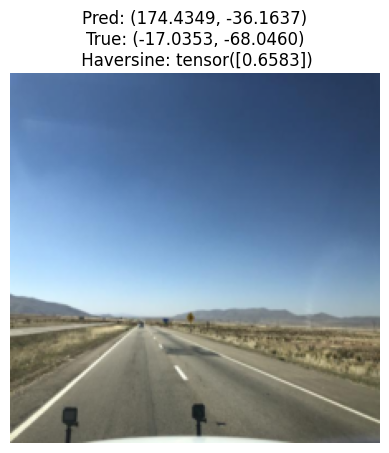

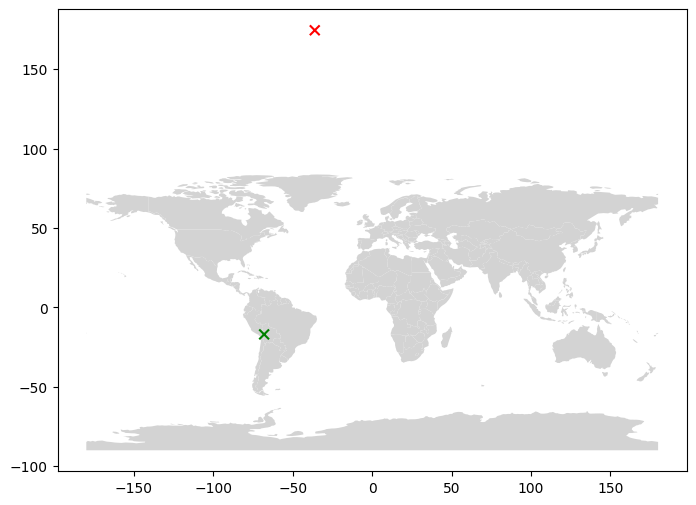

In [ ]:
plot_predictions(model, val_dataloader, num_samples=10)